<a href="https://colab.research.google.com/github/nidaa-hub/HaifaUniv_AI_Lab_2022/blob/main/AI_2022_Lab_4_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Press ▶ or ctrl+Enter
* ID Submetter1: 316151232
* ID Submetter2: 038163630

Parasites:
[[5, 3, 0, 8, 4, 7], [5, 9, 7, 0, 8, 2], [1, 3, 7, 2, 4, 5], [0, 9, 3, 1, 6, 8], [2, 8, 4, 3, 7, 0], [8, 7, 5, 1, 0, 9], [1, 2, 9, 0, 7, 3], [6, 4, 5, 2, 9, 7], [3, 2, 0, 8, 1, 4], [4, 3, 9, 8, 5, 7], [7, 0, 4, 2, 1, 8], [4, 8, 9, 2, 1, 6], [3, 7, 0, 6, 1, 2], [1, 7, 6, 4, 2, 5], [3, 0, 6, 8, 4, 2], [7, 3, 1, 8, 4, 2], [0, 5, 2, 1, 8, 4], [1, 4, 6, 8, 2, 7], [2, 6, 4, 7, 8, 0], [6, 8, 2, 1, 9, 5]]
Hosts:
Current Iteration:
Avg:
0.08041666666666651
Best One in This Iteration
[5, 0, 4, 3, 4, 2, 2, 3, 1, 0, 5, 4, 2, 4, 0, 4, 0, 1, 5, 2, 3, 3, 3, 1, 0, 2, 2, 1, 2, 5, 0, 2, 4, 3, 4]
-0.7
[0, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]
-0.7
Current Iteration:
Avg:
0.036319444444444536
Best One in This Iteration
[3, 3, 4, 3, 4, 2, 0, 1, 5, 4, 4, 1, 1, 4, 4, 3, 1, 3, 3, 3, 1, 0, 5, 0, 4, 2, 2, 2, 1, 2, 2, 3]
-0.6
[3, 3, 4, 3, 0, 1, 5, 4, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1]
-0.6
Current Iterati

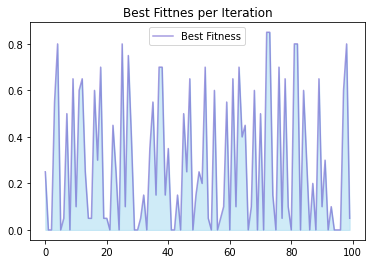

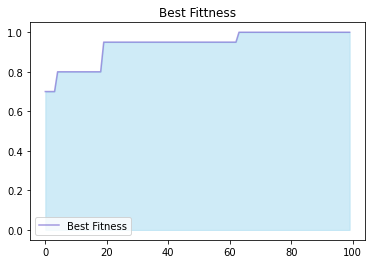

In [ ]:
# ///////////////////////lab 4.1///////////////////////
import numpy as np
import random
from matplotlib import pyplot as plt
from random import randrange, sample, random, randint


CRED = '\033[91m'
CGREEN = '\033[92m'
CFLASH = '\033[5m'
CBOLD = '\33[1m'
CITALIC = '\33[3m'
CEND = '\033[0m'

GA_ELITRATE = 0.1
GA_MAXITER = 100
GA_POPSIZE = 20
GA_POPSIZE2 = 720
HOST_LEN = 30


class Host:

    def __init__(self, string, fitness):
        self.string = string
        self.fitness = fitness

class HillisExperiment:

    def generateHost(self, length, d):
        result=[]
        result = [0 for i in range(length)]
        for i in range(length):
            result[i] = randrange(0, d)
        return result

    def initHosts(self, hosts, k):
        for i in range(len(hosts)):
            host = Host([], 0)
            if k == 6:
                hostLen = randrange(24, 36)
            else:
                hostLen = randrange(120, 300)
            host.string = self.generateHost(hostLen, k)
            hosts[i] = host
        return hosts

    def initParasites(self, parasites, k):
        for i in range(len(parasites)):
            parasites[i] = sample(range(0, 10), k)
        return parasites

    def compare(self, input1, input2, i1, i2):
        if i1 > i2:
            return input1 < input2
        return input1 > input2

    def swap(self, parasite, i1, i2):
        temp = parasite[i1]
        parasite[i1] = parasite[i2]
        parasite[i2] = temp
        return parasite

    def sort(self, parasite, sortingNetwork):
        i = 0
        while i < len(sortingNetwork) - 1:
            i1 = sortingNetwork[i]
            i2 = sortingNetwork[i + 1]
            if self.compare(parasite[i1], parasite[i2], i1, i2):
                parasite = self.swap(parasite, i1, i2)
            i = i + 2

        return parasite

    def checkSorted(self, parasite):
        for i in range(len(parasite) - 1):
            if parasite[i] > parasite[i + 1]:
                return 0
        return 1

    def calcHostFitness(self, host, parasites):
        sortedVector = 0
        for i in range(len(parasites)):
            p = parasites[i].copy()
            new_parasite = self.sort(p, host.string)
            check = self.checkSorted(new_parasite)
            if check == 1:
                sortedVector = sortedVector + 1
        fitness = sortedVector / len(parasites)
        host.fitness = -fitness

        return (host, fitness)

    def calcParasiteFitness(self, parasite, hosts):
        not_sortedVector = 0
        for i in range(len(hosts)):
            new_parasite = self.sort(parasite, hosts[i].string)
            check = self.checkSorted(new_parasite)
            if check == 0:
                not_sortedVector = not_sortedVector + 1

        fitness = not_sortedVector / len(hosts)
        return fitness

    def indirectReplacement(self, host):
        x = 0
        comp = 0
        while x == 0:
            comp = randrange(0, len(host) - 1)
            if comp % 2 == 0:
                x = 1

        input1 = host[comp]
        input2 = host[comp + 1]

        j = comp
        while j < len(host) - 2:
            host[j] = host[j + 2]
            j = j + 1

        x = 0
        comp2 = 0
        while x == 0:
            comp2 = randrange(0, len(host) - 1)
            if comp2 % 2 == 0:
                x = 1

        j = comp2 + 2
        while j < len(host):
            host[j] = host[j - 2]
            j = j + 1

        host[comp2] = input1
        host[comp2 + 1] = input2

        return host

    def sortFitness(self, hosts):
        hosts.sort(key=lambda x: x.fitness)
        return hosts

    def elitism(self, population, buffer, esize):
        temp = population[:esize].copy()
        buffer[:esize] = temp
        return buffer

    def crossover(self, p1, p2, r ):
        # if p1.fitness > p2.fitness:
            # return p1.host, p1.fitness
        # return p2.host, p2.fitness
        result = []
        result = [0 for i in range(len(p1.string))]
        #result = [0] * len(p1.string)
        for i in range(len(p1.string)):
            result[i] = randrange(0, r)
        return result

    def mate(self, population, buffer, k):
        esize = int(GA_POPSIZE2 * GA_ELITRATE)
        buffer = self.elitism(population, buffer, esize)

        # mate the rest

        for i in range(esize, GA_POPSIZE2):
            i1 = randint(0, int(GA_POPSIZE2/2) - 1)
            i2 = randint(0, int(GA_POPSIZE2/2) - 1)

            new_host = self.crossover(population[i1], population[i2], k)
            buffer[i].string = new_host

        return buffer

    def mutate(self, prob, hosts):
        newhost = Host([], 0)

        for i in range(len(hosts)):
            x = random()
            if x < prob:
                newhost.string = \
                    problem.indirectReplacement(hosts[i].string)
                (newhost, newfit) = \
                    problem.calcHostFitness(newhost, parasites)
                if newfit > -hosts[i].fitness:
                    hosts[i].string = newhost.string
                    hosts[i].fitness = newfit

        return hosts

    def mutate2(self, prob, hosts, iteravg):
        newhost = Host([], 0)

        for i in range(len(hosts)):
            x = random()
            if hosts[i].fitness < iteravg:
                newhost.string = \
                    problem.indirectReplacement(hosts[i].string)
                (newhost, newfit) = \
                    problem.calcHostFitness(newhost, parasites)
                if newfit > -hosts[i].fitness:
                    hosts[i].string = newhost.string
                    hosts[i].fitness = newfit
        return hosts

    def printSolution(self, host):
        plt.title('Best Sorting Network:')

        point1 = [0, 0]
        point2 = [0, 0]

        x_values = []
        y_values = []

        for i in range(int(len(host) / 2)):
            point1 = [i + 1, host[i]]
            point2 = [i + 1, host[i + 1]]

            x_values.append(point1[0])
            x_values.append(point2[0])
            y_values.append(point1[1])
            y_values.append(point2[1])

        plt.plot(x_values, y_values)
        plt.show()


if __name__ == '__main__':

    problem = HillisExperiment()
    k = 6
    parasites = [0 for i in range(GA_POPSIZE)]
    hosts = [Host for i in  range(GA_POPSIZE2)]
    buffer = [Host for i in range(GA_POPSIZE2)]
    parasites = problem.initParasites(parasites, k)
    print (CEND + 'Parasites:' + CGREEN)
    print (parasites)
    hosts = problem.initHosts(hosts, k)
    print (CEND + 'Hosts:' + CGREEN)

    #for i in range(len(hosts)):
        #print (hosts[i].string)
        #print (hosts[i].fitness)

    buffer = hosts.copy()

    #for i in range(len(parasites)):
      #p = problem.sort(parasites[i], hosts[i])
      #print(p)

    prob = 0.8

    x = [0 for i in range(GA_MAXITER)]
    A = [0 for i in range(GA_MAXITER)]
    B = [0 for i in range(GA_MAXITER)]

    best_fit = 0
    best_host = []

    for t in range(GA_MAXITER ):
        print (CEND + 'Current Iteration:' + CGREEN)
        f = 0
        x[t] = t

        for i in range(len(hosts)):
            # calculate the fitness for each host
            tmp_parasites = parasites.copy()
            # print(tmp_parasites)
            (host, fit) = problem.calcHostFitness(hosts[i], tmp_parasites)

            # print("current host")
            # print(host.host)
            # print(fit)

            f = f + fit

            if fit >= best_fit:
                best_fit = fit
                best_host = host.string

        # calculate the average fitness of this iteration

        avgf = f / len(hosts)
        print (CEND + 'Avg:' + CGREEN)
        print (avgf)

        A[t] = -hosts[0].fitness
        B[t] = best_fit

        hosts = problem.sortFitness(hosts)

        #print (CEND + 'after sorting:' + CGREEN)

        for i in range(len(hosts)):
            pass
            #print (hosts[i].string)
            #print (hosts[i].fitness)
        print (CEND + 'Best One in This Iteration' + CGREEN)

        print (hosts[0].string)
        print (hosts[0].fitness)
        newhost = Host([], 0)

        buffer = problem.mate(hosts, buffer, k)
        hosts = buffer
        hosts = problem.mutate(prob, hosts)

        print (hosts[0].string)
        print (hosts[0].fitness)

        # print("last hosts:")
        # for i in range(len(hosts)):
          #  print(hosts[i].host)
          #  print(hosts[i].fitness)

    print ()
    print (best_host)
    print (best_fit)
    print (int(len(best_host) / 2))

    plt.title('Best Fittnes per Iteration')
    plt.plot(x, A, color="Slateblue", alpha=0.6, label='Best Fitness')
    plt.fill_between( x, A, color="skyblue", alpha=0.4)
    plt.legend()
    plt.show()

    plt.title('Best Fittness')
    plt.plot(x, B, color="Slateblue", alpha=0.6, label='Best Fitness')
    plt.fill_between( x, B, color="skyblue", alpha=0.4)
    plt.legend()

    # plt.show()